In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
# Load the WHO suicide dataset
df = pd.read_csv('who_suicide_statistics.csv')

# Display first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (43776, 6)


,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [8]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Drop rows where 'suicides_no' is missing
df = df.dropna(subset=['suicides_no'])

# Convert to numeric (just in case)
df['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')
df = df.dropna(subset=['suicides_no'])

# Create suicide rate per 100,000 people
df['suicide_rate_per_100k'] = (df['suicides_no'] / df['population']) * 100000

print(f"Cleaned dataset shape: {df.shape}")
df[['country', 'year', 'suicides_no', 'population', 'suicide_rate_per_100k']].head()

Missing values:
country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64
Cleaned dataset shape: (41520, 7)


,country,year,suicides_no,population,suicide_rate_per_100k
24,Albania,1987,14.0,289700.0,4.832585
25,Albania,1987,4.0,257200.0,1.555210
26,Albania,1987,6.0,278800.0,2.152080
27,Albania,1987,0.0,311000.0,0.000000
28,Albania,1987,0.0,144600.0,0.000000


In [9]:
class CountryStats:
    """
    Analyze suicide trends for a specific country.
    """
    def __init__(self, country_name, df):
        self.country = country_name
        self.data = df[df['country'] == country_name].copy()
        if self.data.empty:
            raise ValueError(f"No data found for {country_name}")
        self.data = self.data.sort_values('year')
    
    def avg_suicide_rate(self):
        return self.data['suicide_rate_per_100k'].mean()
    
    def trend(self):
        rates = self.data['suicide_rate_per_100k'].values
        if len(rates) < 2:
            return "Stable"
        slope = np.polyfit(range(len(rates)), rates, 1)[0]
        return "Increasing" if slope > 0 else "Decreasing" if slope < 0 else "Stable"
    
    def total_suicides(self):
        return self.data['suicides_no'].sum()
    
    def __str__(self):
        return (f"{self.country}: Avg Rate = {self.avg_suicide_rate():.2f}/100k, "
                f"Trend = {self.trend()}, Total = {int(self.total_suicides())}")

In [10]:
def get_top_countries_by_rate(df, n=10):
    """Returns top N countries by average suicide rate."""
    return df.groupby('country')['suicide_rate_per_100k'].mean().sort_values(ascending=False).head(n)

def group_by_age_and_sex(df):
    """Returns dictionary of average suicide rates by age and sex."""
    return df.groupby(['age', 'sex'])['suicide_rate_per_100k'].mean().unstack().to_dict(orient='index')

In [11]:
# Get top 5 countries
top_countries = get_top_countries_by_rate(df, 5).index.tolist()

# Dictionary to store analysis
country_analysis = {}

for country in top_countries:
    try:
        stats = CountryStats(country, df)
        country_analysis[country] = {
            'avg_rate': stats.avg_suicide_rate(),
            'trend': stats.trend(),
            'total_suicides': stats.total_suicides()
        }
    except Exception as e:
        print(f"Error with {country}: {e}")

# Print results
print("\nTop 5 Countries Analysis:")
for country, data in country_analysis.items():
    print(f"{country}: {data['avg_rate']:.2f}/100k | Trend: {data['trend']} | Total: {int(data['total_suicides'])}")


Top 5 Countries Analysis:
Hungary: 39.68/100k | Trend: Decreasing | Total: 130018
Lithuania: 38.80/100k | Trend: Decreasing | Total: 42166
Sri Lanka: 37.78/100k | Trend: Decreasing | Total: 80747
Russian Federation: 35.21/100k | Trend: Decreasing | Total: 1500992
Latvia: 32.48/100k | Trend: Decreasing | Total: 24861


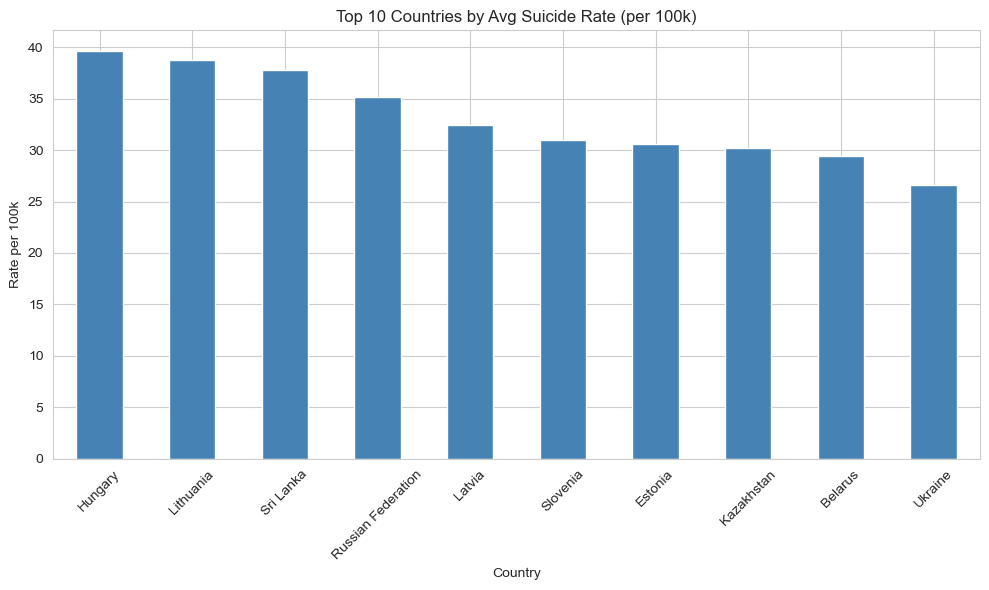

In [12]:
# Bar plot: Top 10 countries
top_10 = get_top_countries_by_rate(df, 10)
top_10.plot(kind='bar', color='steelblue', title="Top 10 Countries by Avg Suicide Rate (per 100k)")
plt.ylabel("Rate per 100k")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

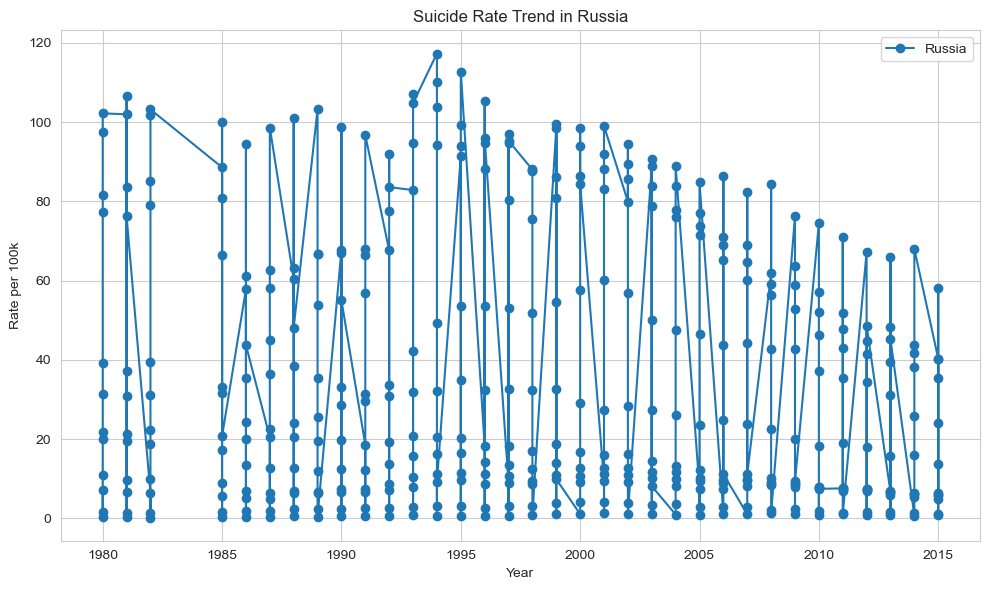

In [13]:
# Line plot: Russia trend
try:
    russia = CountryStats("Russian Federation", df)
    plt.plot(russia.data['year'], russia.data['suicide_rate_per_100k'], marker='o', label="Russia")
    plt.title("Suicide Rate Trend in Russia")
    plt.xlabel("Year")
    plt.ylabel("Rate per 100k")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
except:
    print("No data available for Russian Federation")

In [14]:
# Print summary using class
print("Detailed Summary:")
for country in ["United States of America", "Japan", "Germany", "France", "Brazil"]:
    try:
        c = CountryStats(country, df)
        print(c)
    except:
        print(f"Data not available for {country}")

Detailed Summary:
United States of America: Avg Rate = 13.97/100k, Trend = Decreasing, Total = 1201401
Japan: Avg Rate = 22.19/100k, Trend = Decreasing, Total = 937614
Germany: Avg Rate = 15.56/100k, Trend = Decreasing, Total = 291262
France: Avg Rate = 22.45/100k, Trend = Decreasing, Total = 395500
Brazil: Avg Rate = 5.68/100k, Trend = Increasing, Total = 250824
